# Prompt Data Analysis Tools
Thomas Mattson

Westmont College - CS-195 Senior Seminar

April 29, 2023

## Read Prompt Data

In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import PorterStemmer

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('PromptsToAnalyze.csv')

# Create an instance of the PorterStemmer
stemmer = PorterStemmer()

# Function to remove adjectives and stopwords
'''
def remove_adjectives_stopwords(tokenized_text):
    pos_tagged_text = pos_tag(tokenized_text)
    stop_words = set(stopwords.words('english'))
    return [word.lower() for word, tag in pos_tagged_text if tag not in ['JJ', 'JJR', 'JJS'] and word.lower() not in stop_words]
'''
# Function to remove stopwords
def remove_stopwords(tokenized_text):
    stop_words = set(stopwords.words('english'))
    filtered_text = []
    for word in tokenized_text:
        if word.lower() not in stop_words:
            filtered_text.append(word.lower())
    return filtered_text

# Function to remove adjectives
def remove_adjectives(tokenized_text):
    pos_tagged_text = pos_tag(tokenized_text)
    filtered_text = []
    for word, tag in pos_tagged_text:
        if tag not in ['JJ', 'JJR', 'JJS']:
            filtered_text.append(word.lower())
    return filtered_text

# Function to remove colors
def remove_words(tokenized_text):
    wordsToRemove = ['style', 'background', 'light', 'dark', 'color', 'colors', 'photo']
    filtered_text = []
    for word in tokenized_text:
        if word not in wordsToRemove:
            filtered_text.append(word.lower())
    return filtered_text

# Function to stem the words
def stem_tokens(tokenized_text):
    stemmed_text = []
    for word in tokenized_text:
        stemmed_word = stemmer.stem(word)
        stemmed_text.append(stemmed_word)
    return stemmed_text

# Apply tokenization and adjective removal to the 'Prompt' column
df['Tokenized Text'] = df['Prompt'].apply(word_tokenize)
df['Tokenized Text'] = df['Tokenized Text'].apply(remove_stopwords)

# Create a new column 'Adjectives Removed' by removing adjectives from 'Tokenized Text'
df['Adjectives Removed'] = df['Tokenized Text'].apply(remove_adjectives)

# Create a new column 'No Adjectives or Key Words' by removing colors from 'Adjectives Removed'
df['No Adjectives or Key Words'] = df['Adjectives Removed'].apply(remove_words)

# Create a new column 'Stemmed Tokens' by stemming the words in 'Tokenized Text'
df['Stemmed Tokens'] = df['Tokenized Text'].apply(stem_tokens)

# Create a new column 'No Adjectives Stemmed Tokens' by stemming the words in 'Adjectives Removed'
df['No Adjectives Stemmed Tokens'] = df['Adjectives Removed'].apply(stem_tokens)

# Create a new column 'No Adjectives or Colors Stemmed Tokens' by stemming the words in 'No Adjectives or Colors'
df['No Adjectives or Key Words Stemmed Tokens'] = df['No Adjectives or Key Words'].apply(stem_tokens)



# Print the first few rows of the DataFrame to check that it loaded correctly
print(df.head(2))

      Channel                            ID                     Prompt  \
0  newbies 33    747,838,555,761,672,000.00  EXTERNALURL  EXTERNALURL    
1   newbies 3  1,083,119,432,282,410,000.00  EXTERNALURL  EXTERNALURL    

        Date              Tokenized Text          Adjectives Removed  \
0  3/29/2023  [externalurl, externalurl]  [externalurl, externalurl]   
1  3/29/2023  [externalurl, externalurl]  [externalurl, externalurl]   

   No Adjectives or Key Words              Stemmed Tokens  \
0  [externalurl, externalurl]  [externalurl, externalurl]   
1  [externalurl, externalurl]  [externalurl, externalurl]   

  No Adjectives Stemmed Tokens No Adjectives or Key Words Stemmed Tokens  
0   [externalurl, externalurl]                [externalurl, externalurl]  
1   [externalurl, externalurl]                [externalurl, externalurl]  


In [2]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('PromptsToAnalyze.csv')

# Create an instance of the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to remove stopwords
def remove_stopwords(tokenized_text):
    stop_words = set(stopwords.words('english'))
    filtered_text = []
    for word in tokenized_text:
        if word.lower() not in stop_words:
            filtered_text.append(word.lower())
    return filtered_text

# Function to remove adjectives
def remove_adjectives(tokenized_text):
    pos_tagged_text = pos_tag(tokenized_text)
    filtered_text = []
    for word, tag in pos_tagged_text:
        if tag not in ['JJ', 'JJR', 'JJS']:
            filtered_text.append(word.lower())
    return filtered_text

# Function to remove colors
def remove_words(tokenized_text):
    wordsToRemove = ['style', 'background', 'light', 'dark', 'color', 'colors', 'photo']
    filtered_text = []
    for word in tokenized_text:
        if word not in wordsToRemove:
            filtered_text.append(word.lower())
    return filtered_text

# Function to lemmatize the words
def lemmatize_tokens(tokenized_text):
    lemmatized_text = []
    for word in tokenized_text:
        lemma = lemmatizer.lemmatize(word)
        lemmatized_text.append(lemma.lower())
    return lemmatized_text

# Apply tokenization and adjective removal to the 'Prompt' column
df['Tokenized Text'] = df['Prompt'].apply(word_tokenize)
df['Tokenized Text'] = df['Tokenized Text'].apply(remove_stopwords)

# Create a new column 'Adjectives Removed' by removing adjectives from 'Tokenized Text'
df['Adjectives Removed'] = df['Tokenized Text'].apply(remove_adjectives)

# Create a new column 'No Adjectives or Key Words' by removing colors from 'Adjectives Removed'
df['No Adjectives or Key Words'] = df['Adjectives Removed'].apply(remove_words)

# Create a new column 'Lemmatized Tokens' by lemmatizing the words in 'Tokenized Text'
df['Lemmatized Tokens'] = df['Tokenized Text'].apply(lemmatize_tokens)

# Create a new column 'No Adjectives Lemmatized Tokens' by lemmatizing the words in 'Adjectives Removed'
df['No Adjectives Lemmatized Tokens'] = df['Adjectives Removed'].apply(lemmatize_tokens)

# Create a new column 'No Adjectives or Colors Lemmatized Tokens' by lemmatizing the words in 'No Adjectives or Colors'
df['No Adjectives or Key Words Lemmatized Tokens'] = df['No Adjectives or Key Words'].apply(lemmatize_tokens)

# Print the first few rows of the DataFrame to check that it loaded correctly
print(df.head(2))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tdmat\AppData\Roaming\nltk_data...


      Channel                            ID                     Prompt  \
0  newbies 33    747,838,555,761,672,000.00  EXTERNALURL  EXTERNALURL    
1   newbies 3  1,083,119,432,282,410,000.00  EXTERNALURL  EXTERNALURL    

        Date              Tokenized Text          Adjectives Removed  \
0  3/29/2023  [externalurl, externalurl]  [externalurl, externalurl]   
1  3/29/2023  [externalurl, externalurl]  [externalurl, externalurl]   

   No Adjectives or Key Words           Lemmatized Tokens  \
0  [externalurl, externalurl]  [externalurl, externalurl]   
1  [externalurl, externalurl]  [externalurl, externalurl]   

  No Adjectives Lemmatized Tokens No Adjectives or Key Words Lemmatized Tokens  
0      [externalurl, externalurl]                   [externalurl, externalurl]  
1      [externalurl, externalurl]                   [externalurl, externalurl]  


### Create New File to Work With

In [2]:
newFileName = 'PromptsToAnalyze_Tokenized.csv'

df.to_csv(newFileName, index=False)

## Sentiment Analysis using NLTK

### Sentiment Calculation

In [3]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Download necessary resources
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis for each prompt
sentiment_scores = []
for prompt in df['Prompt']:
    scores = sia.polarity_scores(prompt)
    sentiment_scores.append(scores)

# Create a new DataFrame with the sentiment scores and prompts
sentimentAnalysis_df = pd.DataFrame(sentiment_scores)
sentimentAnalysis_df.columns = ['Negative', 'Neutral', 'Positive', 'Compound']
sentimentAnalysis_df['Prompt'] = df['Prompt']  # Add the 'Prompt' column
sentimentAnalysis_df = sentimentAnalysis_df[['Prompt', 'Negative', 'Neutral', 'Positive', 'Compound']]  # Reorder columns

print(sentimentAnalysis_df.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tdmat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              Prompt  Negative  Neutral  \
0                          EXTERNALURL  EXTERNALURL      0.000    1.000   
1                          EXTERNALURL  EXTERNALURL      0.000    1.000   
2  an indian tech nerd dressed like Tom Cruise in...     0.073    0.733   
3  art for podcast named Taste Buds that is hoste...     0.000    1.000   
4  8k photo realistic great white shark on beach ...     0.000    0.823   

   Positive  Compound  
0     0.000    0.0000  
1     0.000    0.0000  
2     0.193    0.5574  
3     0.000    0.0000  
4     0.177    0.6249  


### Sentiment Visualization

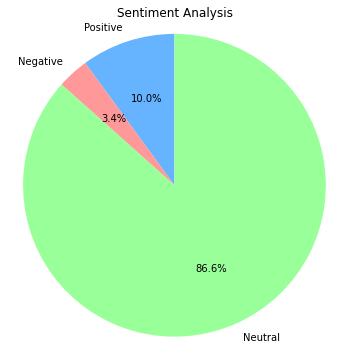

In [4]:
import matplotlib.pyplot as plt

# Plotting a pie chart of the sentiment distribution
sizes = sentimentAnalysis_df[['Positive', 'Negative', 'Neutral']].mean()
plt.figure(figsize=(6, 6))
labels = ['Positive', 'Negative', 'Neutral']
colors = ['#66b3ff', '#ff9999', '#99ff99']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Analysis')
plt.axis('equal')
plt.show()

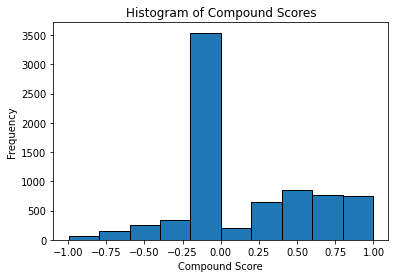

In [5]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'sentimentAnalysis_df' with a column named 'Compound'
# Extract the compound scores
compound_scores = sentimentAnalysis_df['Compound']

# Create a histogram
plt.hist(compound_scores, bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Histogram of Compound Scores')

# Display the histogram
plt.show()


### Sentiment Output

In [6]:
# Assuming you have the 'output_data' DataFrame

# Define the output file path
sentiment_output_file = 'sentiment_analysis.csv'

# Write the output DataFrame to a new CSV file
sentimentAnalysis_df.to_csv(sentiment_output_file, index=False)
print(f"Sentiment analysis saved to {sentiment_output_file}.")

Sentiment analysis saved to sentiment_analysis.csv.


## Word Frequency

### Frequency Processing

In [7]:
from collections import Counter

# Function to compute word frequency
def compute_word_frequency(tokens):
    word_freq = Counter(tokens)
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    return pd.DataFrame(sorted_word_freq, columns=['Word', 'Frequency'])

# Create word frequency data frames
wordFrequency_tokenized_df = compute_word_frequency([word for tokens in df['Tokenized Text'] for word in tokens])
wordFrequency_noAdjectives_df = compute_word_frequency([word for tokens in df['Adjectives Removed'] for word in tokens])
wordFrequency_noAdjectivesOrKeyWords_df = compute_word_frequency([word for tokens in df['No Adjectives or Key Words'] for word in tokens])
wordFrequency_stemmed_df = compute_word_frequency([word for tokens in df['Stemmed Tokens'] for word in tokens])
wordFrequency_stemmed_noAdjectives_df = compute_word_frequency([word for tokens in df['No Adjectives Stemmed Tokens'] for word in tokens])
wordFrequency_stemmed_noAdjectivesOrKeyWords_df = compute_word_frequency([word for tokens in df['No Adjectives or Key Words Stemmed Tokens'] for word in tokens])

# Print the word frequency data frames
print("Word Frequency - Tokenized Words:")
print(wordFrequency_tokenized_df.head(2))
print()
print("Word Frequency - Tokenized Words with No Adjectives:")
print(wordFrequency_noAdjectives_df.head(2))
print()
print("Word Frequency - Tokenized Words with No Adjectives or Key Words:")
print(wordFrequency_noAdjectivesOrKeyWords_df.head(2))
print()
print("Word Frequency - Stemmed Words:")
print(wordFrequency_stemmed_df.head(2))
print()
print("Word Frequency - Stemmed Words with No Adjectives:")
print(wordFrequency_stemmed_noAdjectives_df.head(2))
print()
print("Word Frequency - Stemmed Words with No Adjectives or Key Words:")
print(wordFrequency_stemmed_noAdjectivesOrKeyWords_df.head(2))

Word Frequency - Tokenized Words:
    Word  Frequency
0  style       1478
1  photo       1220

Word Frequency - Tokenized Words with No Adjectives:
    Word  Frequency
0  style       1478
1  photo       1170

Word Frequency - Tokenized Words with No Adjectives or Key Words:
          Word  Frequency
0  externalurl        912
1        woman        693

Word Frequency - Stemmed Words:
    Word  Frequency
0  style       1504
1  light       1257

Word Frequency - Stemmed Words with No Adjectives:
    Word  Frequency
0  style       1504
1  photo       1195

Word Frequency - Stemmed Words with No Adjectives or Key Words:
          Word  Frequency
0  externalurl        913
1        woman        755


In [3]:
from collections import Counter

# Function to compute word frequency
def compute_word_frequency(tokens):
    word_freq = Counter(tokens)
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    return pd.DataFrame(sorted_word_freq, columns=['Word', 'Frequency'])

# Create word frequency data frames
wordFrequency_tokenized_df = compute_word_frequency([word for tokens in df['Tokenized Text'] for word in tokens])
wordFrequency_noAdjectives_df = compute_word_frequency([word for tokens in df['Adjectives Removed'] for word in tokens])
wordFrequency_noAdjectivesOrKeyWords_df = compute_word_frequency([word for tokens in df['No Adjectives or Key Words'] for word in tokens])
wordFrequency_stemmed_df = compute_word_frequency([word for tokens in df['Lemmatized Tokens'] for word in tokens])
wordFrequency_stemmed_noAdjectives_df = compute_word_frequency([word for tokens in df['No Adjectives Lemmatized Tokens'] for word in tokens])
wordFrequency_stemmed_noAdjectivesOrKeyWords_df = compute_word_frequency([word for tokens in df['No Adjectives or Key Words Lemmatized Tokens'] for word in tokens])

# Print the word frequency data frames
print("Word Frequency - Tokenized Words:")
print(wordFrequency_tokenized_df.head(2))
print()
print("Word Frequency - Tokenized Words with No Adjectives:")
print(wordFrequency_noAdjectives_df.head(2))
print()
print("Word Frequency - Tokenized Words with No Adjectives or Key Words:")
print(wordFrequency_noAdjectivesOrKeyWords_df.head(2))
print()
print("Word Frequency - Stemmed Words:")
print(wordFrequency_stemmed_df.head(2))
print()
print("Word Frequency - Stemmed Words with No Adjectives:")
print(wordFrequency_stemmed_noAdjectives_df.head(2))
print()
print("Word Frequency - Stemmed Words with No Adjectives or Key Words:")
print(wordFrequency_stemmed_noAdjectivesOrKeyWords_df.head(2))

Word Frequency - Tokenized Words:
    Word  Frequency
0  style       1478
1  photo       1220

Word Frequency - Tokenized Words with No Adjectives:
    Word  Frequency
0  style       1478
1  photo       1170

Word Frequency - Tokenized Words with No Adjectives or Key Words:
          Word  Frequency
0  externalurl        912
1        woman        693

Word Frequency - Stemmed Words:
    Word  Frequency
0  style       1485
1  photo       1245

Word Frequency - Stemmed Words with No Adjectives:
    Word  Frequency
0  style       1485
1  photo       1195

Word Frequency - Stemmed Words with No Adjectives or Key Words:
          Word  Frequency
0  externalurl        912
1        woman        836


### Frequency Analysis

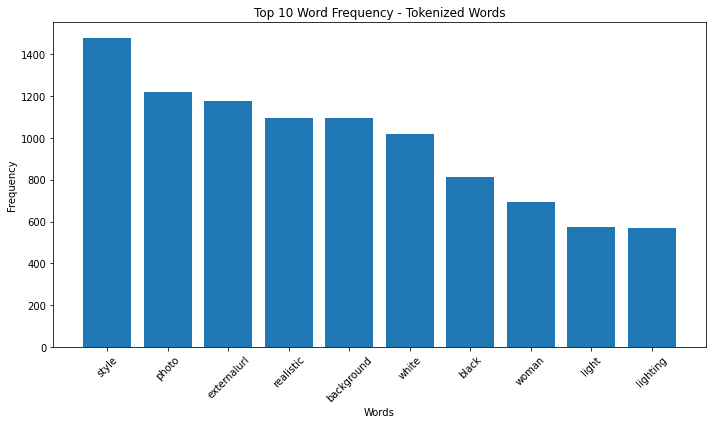

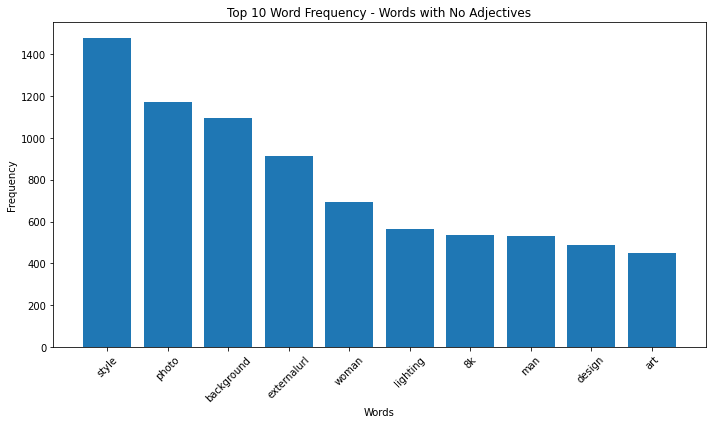

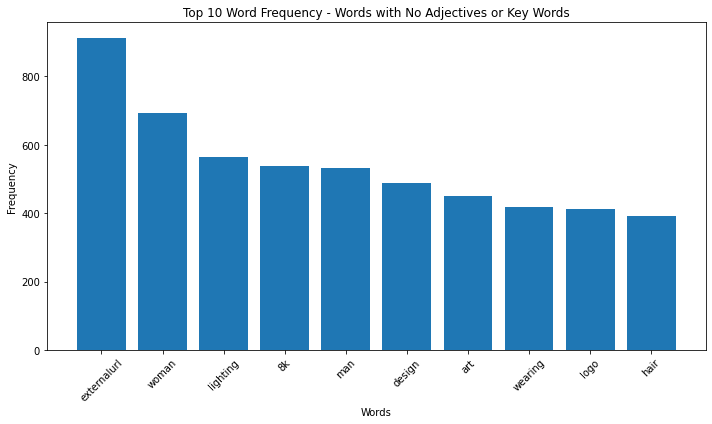

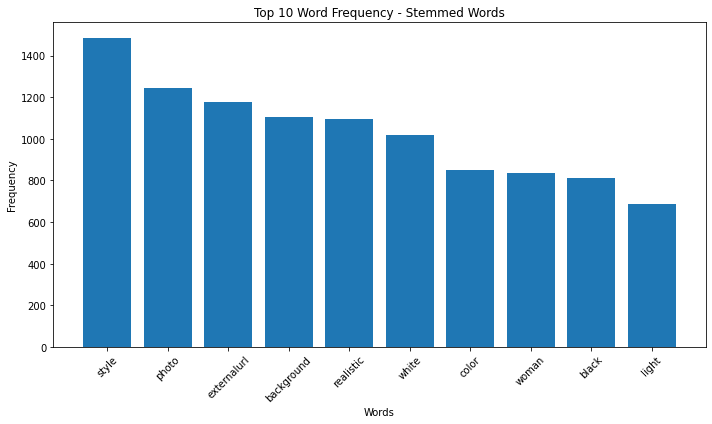

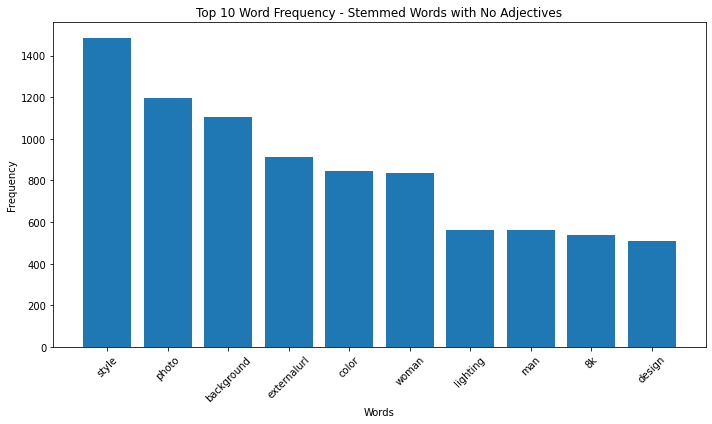

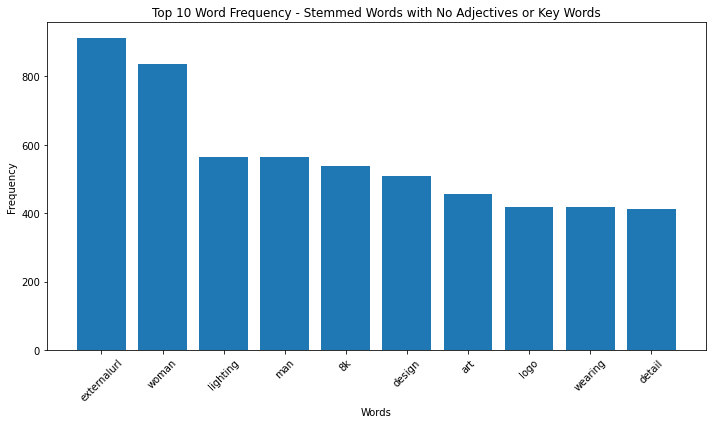

In [4]:
import matplotlib.pyplot as plt

# Define a function to create a bar plot for word frequencies
def create_word_frequency_plot(data_frame, title, num_words=10):
    top_words = data_frame.head(num_words)
    title_formatted = f'Top {num_words} {title}'
    plt.figure(figsize=(10, 6))
    plt.bar(top_words['Word'], top_words['Frequency'])
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title_formatted)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create bar plots for each word frequency data frame
num_words = 10  # Number of words to display

create_word_frequency_plot(wordFrequency_tokenized_df, 'Word Frequency - Tokenized Words', num_words)
create_word_frequency_plot(wordFrequency_noAdjectives_df, 'Word Frequency - Words with No Adjectives', num_words)
create_word_frequency_plot(wordFrequency_noAdjectivesOrKeyWords_df, 'Word Frequency - Words with No Adjectives or Key Words', num_words)

create_word_frequency_plot(wordFrequency_stemmed_df, 'Word Frequency - Stemmed Words', num_words)
create_word_frequency_plot(wordFrequency_stemmed_noAdjectives_df, 'Word Frequency - Stemmed Words with No Adjectives', num_words)
create_word_frequency_plot(wordFrequency_stemmed_noAdjectivesOrKeyWords_df, 'Word Frequency - Stemmed Words with No Adjectives or Key Words', num_words)


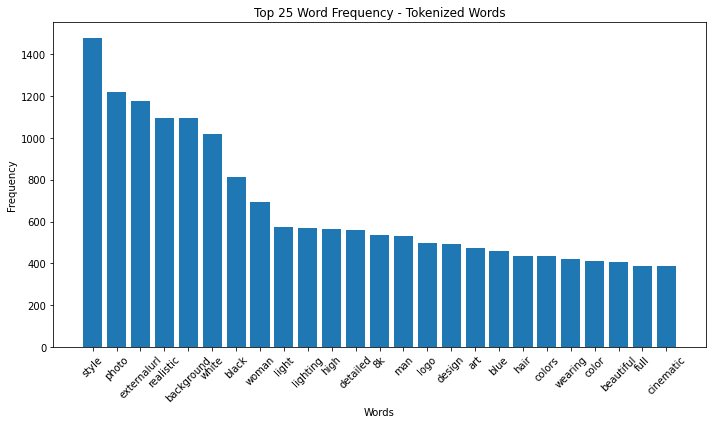

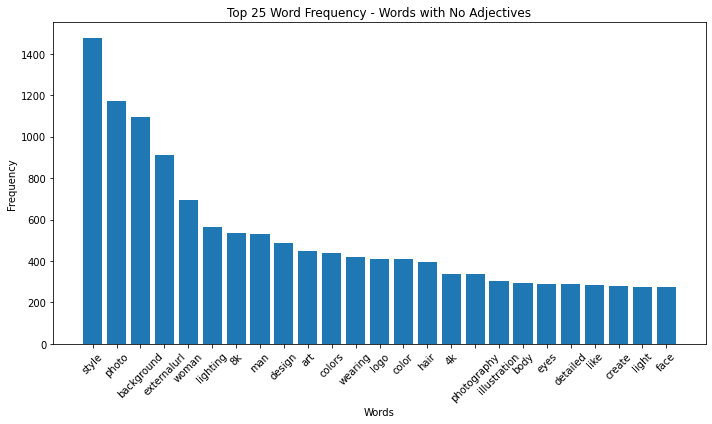

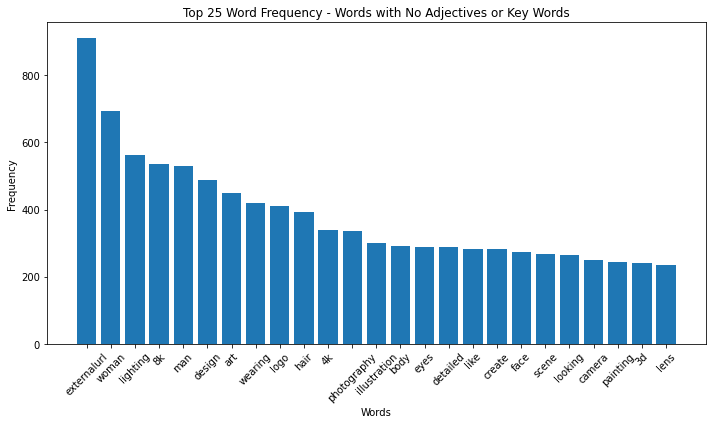

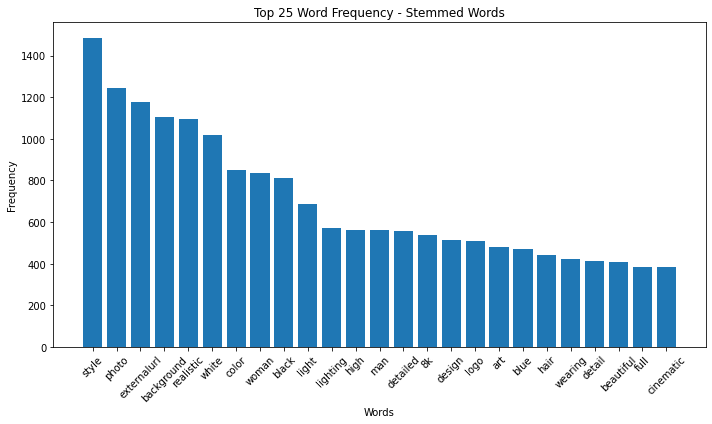

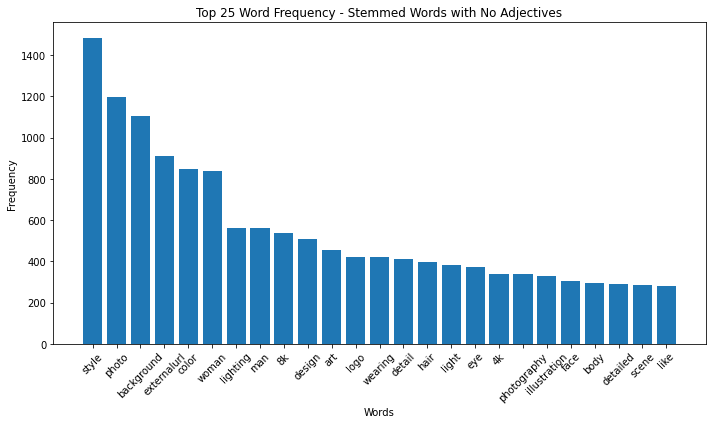

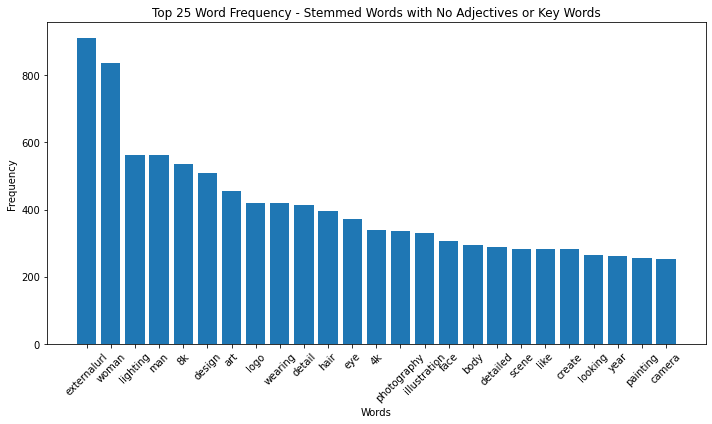

In [5]:
num_words = 25  # Number of words to display

create_word_frequency_plot(wordFrequency_tokenized_df, 'Word Frequency - Tokenized Words', num_words)
create_word_frequency_plot(wordFrequency_noAdjectives_df, 'Word Frequency - Words with No Adjectives', num_words)
create_word_frequency_plot(wordFrequency_noAdjectivesOrKeyWords_df, 'Word Frequency - Words with No Adjectives or Key Words', num_words)

create_word_frequency_plot(wordFrequency_stemmed_df, 'Word Frequency - Stemmed Words', num_words)
create_word_frequency_plot(wordFrequency_stemmed_noAdjectives_df, 'Word Frequency - Stemmed Words with No Adjectives', num_words)
create_word_frequency_plot(wordFrequency_stemmed_noAdjectivesOrKeyWords_df, 'Word Frequency - Stemmed Words with No Adjectives or Key Words', num_words)

### Frequency Output to File

In [10]:
# Define the output file path
output_file = 'tokenized_word_frequencies.csv'

# Save the DataFrame to CSV
wordFrequency_tokenized_df.to_csv(output_file, index=False)

print(f"Word frequencies saved to {output_file}.")

Word frequencies saved to tokenized_word_frequencies.csv.


# Natural Language Processing

### Function for Training Model

In [11]:
import gensim
from gensim import corpora

def train_lda_model(column_data, num_topics, passes=10, num_keywords=5):
    # Create a dictionary from the input column data
    dictionary = corpora.Dictionary(column_data)
    # Create a document-term matrix
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in column_data]
    # Train the LDA model
    lda_model = gensim.models.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=passes)
    
    topics = lda_model.get_document_topics(doc_term_matrix)
    dominant_topics = [max(topics[i], key=lambda x: x[1])[0] for i in range(len(topics))]
    
    lda_df = pd.DataFrame(columns=['Tokenized Text', 'Dominant_Topic', 'Keywords'])
    
    for index, tokenized_text in enumerate(column_data):
        dominant_topic = dominant_topics[index]
        
        keywords = lda_model.show_topic(dominant_topic, num_keywords)
        keywords_text = ", ".join([word[0] for word in keywords])
        
        lda_df = lda_df.append({'Tokenized Text': tokenized_text, 'Dominant_Topic': dominant_topic, 'Keywords': keywords_text}, ignore_index=True)

    topicAnalysis_df = lda_df.groupby('Dominant_Topic').size().reset_index(name='Count')
    topicAnalysis_df = topicAnalysis_df.merge(lda_df[['Dominant_Topic', 'Keywords']].drop_duplicates(), on='Dominant_Topic', how='left')
    return lda_df, lda_model, topicAnalysis_df

### Train LDA Models
*Models will take some time to train, expect 30-90 seconds per model*

**Model on Tokenized Prompts**

In [12]:
# Train LDA Model on Tokenized Prompts
lda_df_basicTokenized, lda_model_basicTokenized, lda_topicAnalysis_basicTokenized = train_lda_model(df['Tokenized Text'], 5, passes=20, num_keywords=5)

In [13]:
print(lda_topicAnalysis_basicTokenized)

  Dominant_Topic  Count                                          Keywords
0              0   2155             style, background, white, logo, black
1              1   1534       photo, realistic, lighting, detailed, light
2              2   1482                woman, hair, wearing, black, style
3              3   1625  externalurl, realistic, photo, background, white
4              4    774                 modern, design, use, high, create


**Model on Tokenized Prompts with Adjectives Removed**

In [14]:
lda_df_NoAdj, lda_model_NoAdj, lda_topicAnalysis_NoAdj = train_lda_model(df['Adjectives Removed'], 5, passes=20, num_keywords=5)

In [15]:
print(lda_topicAnalysis_NoAdj)

  Dominant_Topic  Count                                   Keywords
0              0    930          style, photo, like, coloring, art
1              1   1577         style, background, 8k, city, photo
2              2   1415  externalurl, style, background, 8k, color
3              3   2449  photo, woman, style, background, lighting
4              4   1199           design, logo, photo, create, use


**Model on Tokenized Prompts with Adjectives and Key Words Removed**

In [16]:
lda_df_NoAdjNoKeyWords, lda_model_NoAdjNoKeyWords, lda_topicAnalysis_NoAdjNoKeyWords = train_lda_model(df['No Adjectives or Key Words'], 5, passes=20, num_keywords=5)

In [17]:
print(lda_topicAnalysis_NoAdjNoKeyWords)

  Dominant_Topic  Count                                   Keywords
0              0   1169        trees, view, water, camera, drawing
1              1   1205           logo, create, design, use, scene
2              2   1735     externalurl, woman, man, hair, wearing
3              3   2169  lighting, 8k, photography, detailed, shot
4              4   1292      design, art, logo, vector, watercolor


**Model on Tokenized Prompts (Stemmed)**

In [18]:
lda_df_basicTokenized_Stemmed, lda_model_basicTokenized_Stemmed, lda_topicAnalysis_basicTokenized_Stemmed = train_lda_model(df['Stemmed Tokens'], 5, passes=20, num_keywords=5)

In [19]:
print(lda_topicAnalysis_basicTokenized_Stemmed)

  Dominant_Topic  Count                                 Keywords
0              0    904    externalurl, style, dragon, citi, car
1              1   1426     detail, light, color, style, realist
2              2    901         photo, creat, use, captur, scene
3              3   2439         woman, realist, photo, man, hair
4              4   1900  white, color, background, style, design


**Model on Tokenized Prompts with No Adjectives (Stemmed)**

In [20]:
lda_df_NoAdj_Stemmed, lda_model_NoAdj_Stemmed, lda_topicAnalysis_NoAdj_Stemmed = train_lda_model(df['No Adjectives Stemmed Tokens'], 5, passes=20, num_keywords=5)

In [21]:
print(lda_topicAnalysis_NoAdj_Stemmed)

  Dominant_Topic  Count                               Keywords
0              0   1270        logo, design, photo, use, creat
1              1   1837    woman, style, hair, man, background
2              2   1491   style, background, paint, color, art
3              3   1617  light, photo, detail, 8k, photographi
4              4   1355  externalurl, style, detail, 8k, photo


**Model on Tokenized Prompts with No Adjectives and Key Words (Stemmed)**

In [22]:
lda_df_NoAdjNoKeyWords_Stemmed, lda_model_NoAdjNoKeyWords_Stemmed, lda_topicAnalysis_NoAdjNoKeyWords_Stemmed = train_lda_model(df['No Adjectives or Key Words Stemmed Tokens'], 5, passes=20, num_keywords=5)

In [23]:
print(lda_topicAnalysis_NoAdjNoKeyWords_Stemmed)

  Dominant_Topic  Count                              Keywords
0              0   1537     design, use, creat, logo, illustr
1              1   1416  externalurl, logo, make, paint, citi
2              2   1340       len, light, scene, hous, camera
3              3   1924           woman, man, wear, hair, eye
4              4   1353            detail, 8k, light, art, 3d
